In [7]:
import pandas as pd
import numpy as np

Pandas Series

We'll start analyzing "The Group of Seven". Which is a political formed by Canada, France, Germany, Italy, Japan, the United Kingdom and the United States. We'll start by analyzing population, and for that, we'll use a pandas.Series object.

In [8]:
# In millions
g7_pop = pd.Series([35.467, 63.951, 80.940, 60.665, 127.061, 64.511, 318.523])

In [9]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
dtype: float64

Someone might not know we're representing population in millions of inhabitants. Series can have a name, to better document the purpose of the Series:

In [11]:
g7_pop.name = 'G7 Population in millions'

In [12]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

Series are pretty similar to numpy arrays:

In [13]:
g7_pop.dtype

dtype('float64')

In [14]:
g7_pop.values

array([ 35.467,  63.951,  80.94 ,  60.665, 127.061,  64.511, 318.523])

They're actually backed by numpy arrays:

In [15]:
type(g7_pop.values)

numpy.ndarray

And they look like simple Python lists or Numpy Arrays. But they're actually more similar to Python dicts.A Series has an index, that's similar to the automatic index assigned to Python's lists:

In [16]:
g7_pop

0     35.467
1     63.951
2     80.940
3     60.665
4    127.061
5     64.511
6    318.523
Name: G7 Population in millions, dtype: float64

In [17]:
g7_pop[0]

35.467

In [18]:
g7_pop[1]

63.951

In [19]:
g7_pop.index

RangeIndex(start=0, stop=7, step=1)

In [20]:
l = ['a', 'b', 'c']

But, in contrast to lists, we can explicitly define the index:

In [21]:
g7_pop.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [22]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Compare it with the following table:

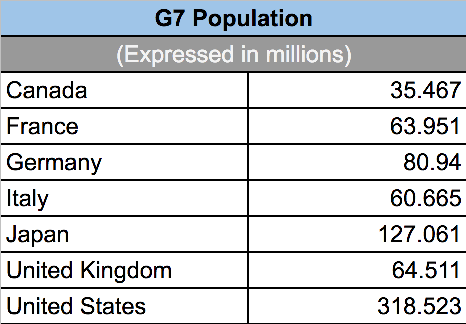

We can say that Series look like "ordered dictionaries". We can actually create Series out of dictionaries:

In [23]:
pd.Series({
    'Canada': 35.467,
    'France': 63.951,
    'Germany': 80.94,
    'Italy': 60.665,
    'Japan': 127.061,
    'United Kingdom': 64.511,
    'United States': 318.523
}, name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [24]:
pd.Series(
    [35.467, 63.951, 80.94, 60.665, 127.061, 64.511, 318.523],
    index=['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
    name='G7 Population in millions')

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [26]:
pd.Series(g7_pop, index=['France', 'Germany', 'Italy', 'Spain'])

France     63.951
Germany    80.940
Italy      60.665
Spain         NaN
Name: G7 Population in millions, dtype: float64

Indexing

Indexing works similarly to lists and dictionaries, you use the index of the element you're looking for:

In [27]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [28]:
g7_pop['Canada']

35.467

In [29]:
g7_pop['Japan']

127.061

Numeric positions can also be used, with the iloc attribute:

In [30]:
g7_pop.iloc[0]

35.467

In [31]:
g7_pop.iloc[-1]

318.523

Selecting multiple elements at once:

In [32]:
g7_pop[['Italy', 'France']]

Italy     60.665
France    63.951
Name: G7 Population in millions, dtype: float64

(The result is another Series)

In [33]:
g7_pop.iloc[[0, 1]]

Canada    35.467
France    63.951
Name: G7 Population in millions, dtype: float64

Slicing also works, but important, in Pandas, the upper limit is also included:

In [34]:
g7_pop['Canada': 'Italy']

Canada     35.467
France     63.951
Germany    80.940
Italy      60.665
Name: G7 Population in millions, dtype: float64

Conditional selection (boolean arrays)

The same boolean array techniques we saw applied to numpy arrays can be used for Pandas Series:

In [35]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [36]:
g7_pop > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [37]:
g7_pop[g7_pop > 70]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [38]:
g7_pop.mean()

107.30257142857144

In [39]:
g7_pop[g7_pop > g7_pop.mean()]

Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [40]:
g7_pop.std()

97.24996987121581

~ not
| or
& and

In [43]:
g7_pop[(g7_pop > g7_pop.mean() - g7_pop.std() / 2) | (g7_pop > g7_pop.mean() + g7_pop.std() / 2)]

France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

Operations and methods

Series also support vectorized operations and aggregation functions as Numpy:

In [44]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [45]:
g7_pop * 1_000_000

Canada             35467000.0
France             63951000.0
Germany            80940000.0
Italy              60665000.0
Japan             127061000.0
United Kingdom     64511000.0
United States     318523000.0
Name: G7 Population in millions, dtype: float64

In [46]:
g7_pop.mean()

107.30257142857144

In [47]:
np.log(g7_pop)

Canada            3.568603
France            4.158117
Germany           4.393708
Italy             4.105367
Japan             4.844667
United Kingdom    4.166836
United States     5.763695
Name: G7 Population in millions, dtype: float64

In [48]:
g7_pop['France': 'Italy'].mean()

68.51866666666666

Boolean arrays

(Work in the same way as numpy)

In [49]:
g7_pop

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [50]:
g7_pop > 80

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: G7 Population in millions, dtype: bool

In [51]:
g7_pop[g7_pop > 80]

Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [52]:
g7_pop[(g7_pop > 80) | (g7_pop < 40)]

Canada            35.467
Germany           80.940
Japan            127.061
United States    318.523
Name: G7 Population in millions, dtype: float64

In [53]:
g7_pop[(g7_pop > 80) & (g7_pop < 200)]

Germany     80.940
Japan      127.061
Name: G7 Population in millions, dtype: float64

Modifying series

In [54]:
g7_pop['Canada'] = 40.5

In [55]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: G7 Population in millions, dtype: float64

In [56]:
g7_pop.iloc[-1] = 500

In [57]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64

In [60]:
g7_pop[g7_pop < 70]

Canada            40.500
France            63.951
Italy             60.665
United Kingdom    64.511
Name: G7 Population in millions, dtype: float64

In [61]:
g7_pop

Canada             40.500
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     500.000
Name: G7 Population in millions, dtype: float64